<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [3]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

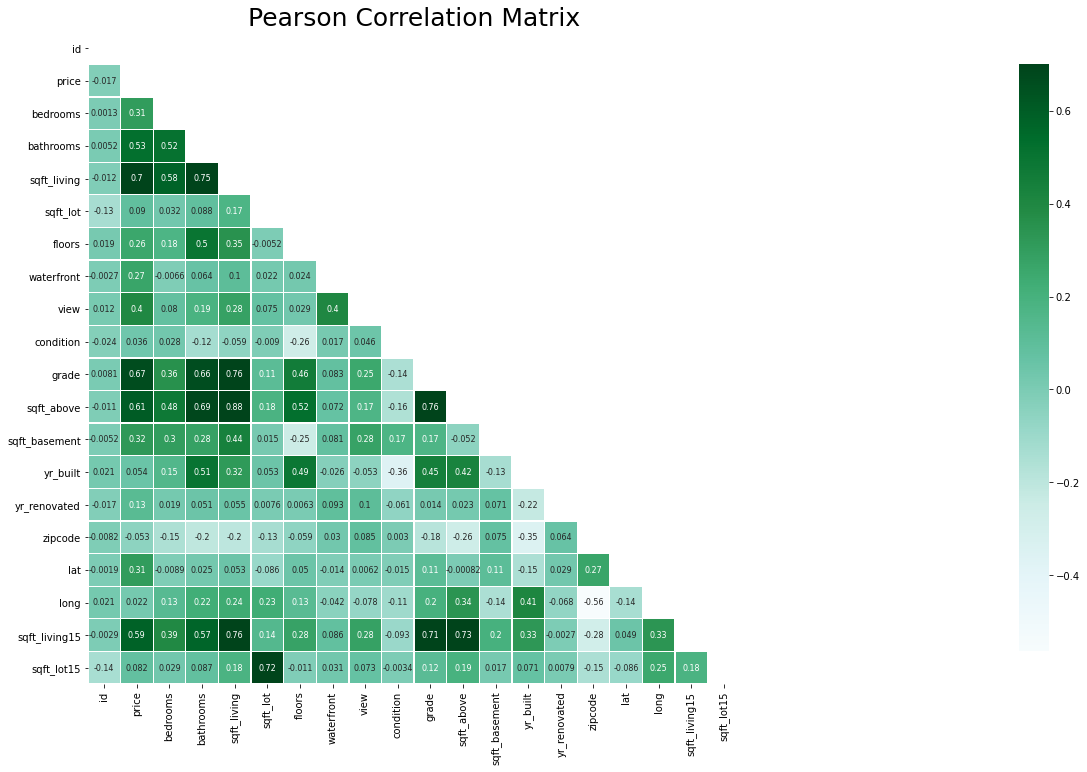

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(100, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [21]:
df.corr()['price'].sort_values(ascending = False)
# sqft_living      0.702035 가 상관관계가 제일 높다.

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

14 ~ 15년 미국 시애틀 King County 지역 집값 평균 가격은 540088.14$ 입니다.
집들간의 평균 오차는 233941.72$ 입니다.


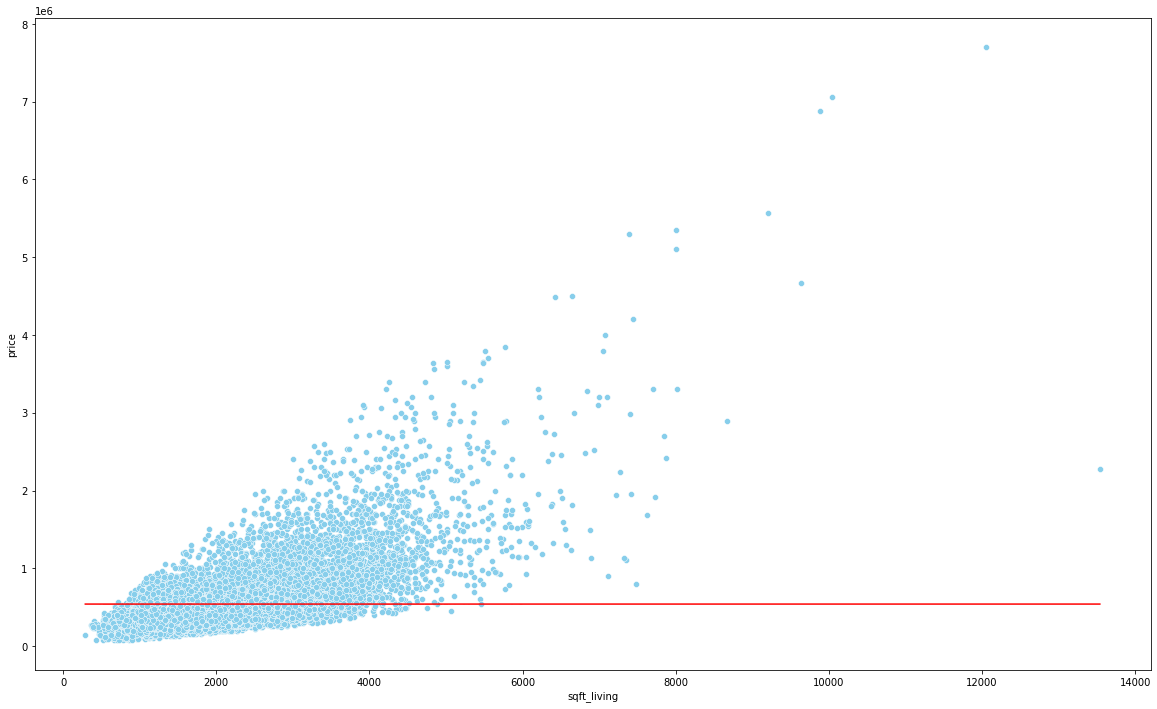

In [32]:
# price와 sqft_living의 관계 시각화
target = df['price']
feature = df['sqft_living']

predict = target.mean()
errors = predict - target
mean_absolute_error = errors.abs().mean()

print('14 ~ 15년 미국 시애틀 King County 지역 집값 평균 가격은 {}$ 입니다.'.format(round(predict, 2)))
print('집들간의 평균 오차는 {}$ 입니다.'.format(round(mean_absolute_error, 2)))

plt.figure(figsize= (20, 12))

sns.lineplot(x=feature, y=predict, color='red')
sns.scatterplot(x=feature, y=target, color='skyblue');

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

- 분류문제: 타겟의 최빈 클래스
- 회귀문제: 타겟의 평균값
- 시계열회귀문제: 이전 타임스탬프의 값

14 ~ 15년 미국 시애틀 King County 지역 집값 평균 가격은 540088.14$ 입니다.
기준 모델은 평균값을 기준값으로 사용해서 평균값을 평균기준모델이라고 할수 있습니다.
따라서 기준모델의 값은 540088.1417665294 입니다.


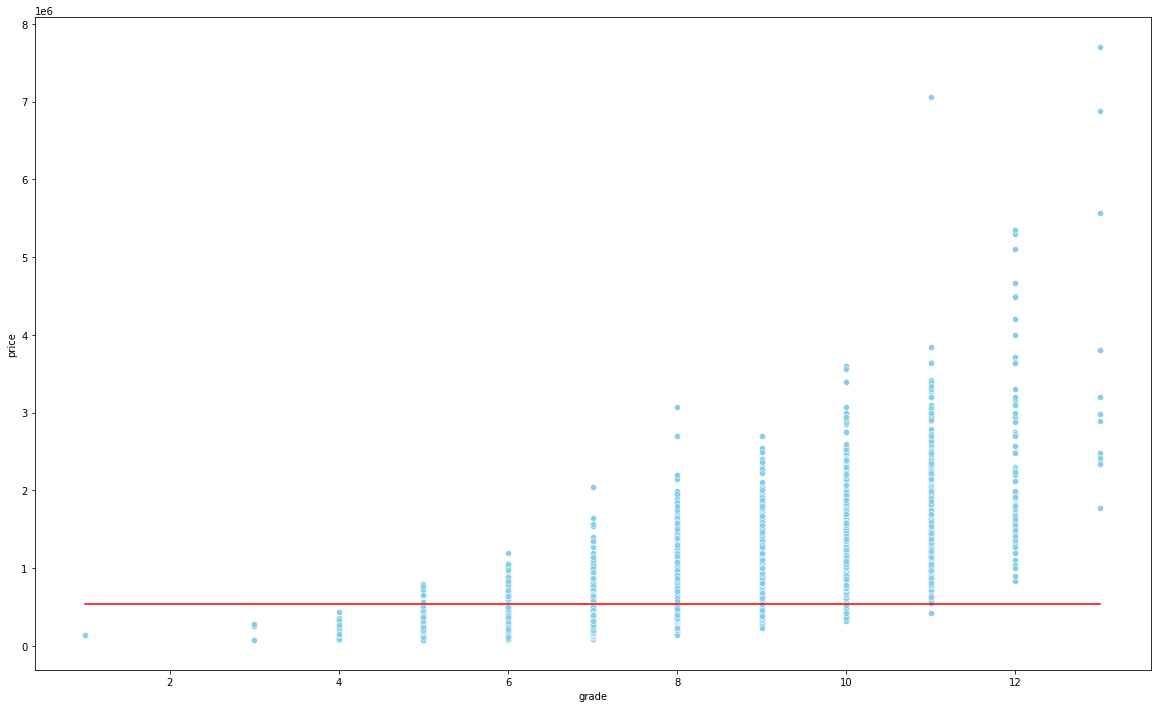

In [33]:
# price와 grade의 관계 시각화
target = df['price']
feature = df['grade']

predict = target.mean()
errors = predict - target
mean_absolute_error = errors.abs().mean()

print('14 ~ 15년 미국 시애틀 King County 지역 집값 평균 가격은 {}$ 입니다.'.format(round(predict, 2)))
print('기준 모델은 평균값을 기준값으로 사용해서 평균값을 평균기준모델이라고 할수 있습니다.')
print('따라서 기준모델의 값은 {} 입니다.'.format(predict))

plt.figure(figsize= (20, 12))

sns.lineplot(x=feature, y=predict, color='red')
sns.scatterplot(x=feature, y=target, color='skyblue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

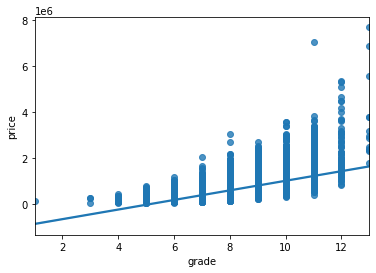

In [36]:
## Seaborn regplot으로 그리면, 
sns.regplot(x=feature, y=target);

In [48]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression
## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700 입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [49]:
## 계수(coefficient)
print('grade에 대한 회귀계수는', model.coef_[0][0], '입니다')

grade에 대한 회귀계수는 208457.56245837914 입니다


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

R^2, p-value, (t-test), coeficient size(beta) 회귀계수

In [50]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression
## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

## 계수(coefficient)
print('sqft_liveing에 대한 회귀계수는', model.coef_[0][0], '입니다')

sqft_liveing에 대한 회귀계수는 280.62356789744825 입니다


## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###